In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bestsellers with categories.csv')
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


 - **Name** - название книги
 - **Author** - автор книги
 - **User Rating** - рейтинг пользователей
 - **Reviews** - отзывы
 - **Price** - цена книги
 - **Year** - год, когда книга была популярна, т.е. заняла первое место в списке бестселлеров
 - **Genre** - жанр книги (Художественный или научный) 

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [132]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [133]:
df.shape

(550, 7)

В наборе данных 7 столбцов и 550 строк. Также нет нулевых значений.

In [150]:
book = df.groupby('Author')['User Rating'].max().sort_values(ascending=False).head(10).reset_index()
book.columns = ['Author','User Rating']
book

,Author,User Rating
0,Jill Twiss,4.9
1,Emily Winfield Martin,4.9
2,Pete Souza,4.9
3,Patrick Thorpe,4.9
4,Chip Gaines,4.9
5,Rush Limbaugh,4.9
6,Nathan W. Pyle,4.9
7,Bill Martin Jr.,4.9
8,Sarah Young,4.9
9,Sherri Duskey Rinker,4.9


Топ-10 авторов с наивысшими рейтингами книг

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Jill Twiss'),
  Text(0, 1, 'Emily Winfield Martin'),
  Text(0, 2, 'Pete Souza'),
  Text(0, 3, 'Patrick Thorpe'),
  Text(0, 4, 'Chip Gaines'),
  Text(0, 5, 'Rush Limbaugh'),
  Text(0, 6, 'Nathan W. Pyle'),
  Text(0, 7, 'Bill Martin Jr.'),
  Text(0, 8, 'Sarah Young'),
  Text(0, 9, 'Sherri Duskey Rinker')])

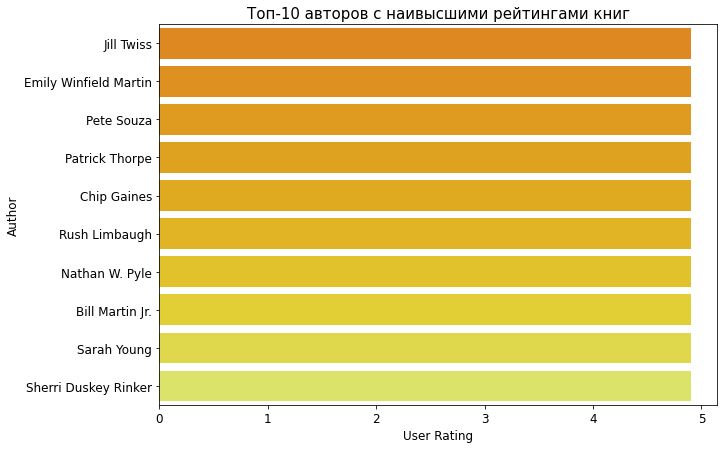

In [146]:
plt.figure(figsize=(10,7))
sns.barplot(y=book['Author'], x=book['User Rating'], palette='Wistia_r')
plt.title('Топ-10 авторов с наивысшими рейтингами книг', fontsize=15)
plt.xlabel('User Rating', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

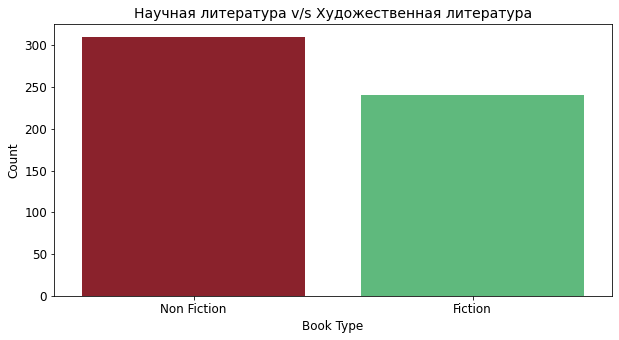

In [136]:
plt.figure(figsize=(10,5))
plt.title('Научная литература v/s Художественная литература', fontsize=14)
sns.countplot(x="Genre", data=df, palette=('#9b111e','#50c878'))
plt.xlabel("Book Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

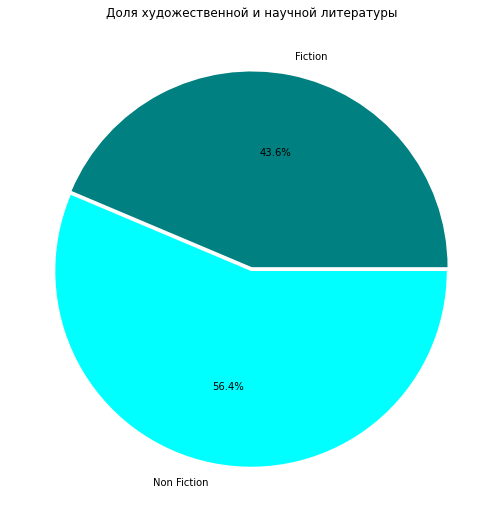

In [137]:
color=['teal', 'cyan']
fig,ax = plt.subplots(figsize=(12,9))
plt.title('Доля художественной и научной литературы')
plt.pie([240,310],labels=['Fiction', 'Non Fiction'],autopct='%1.1f%%',colors=color,explode=[0,0.02])
plt.show()

По диаграммам видим,что книг с научным (non fiction) жанром  больше на 12.8% , чем художественным(fiction) 

### График boxplot

<AxesSubplot:>

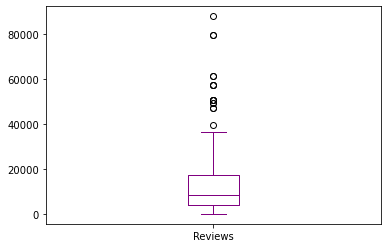

In [138]:
df['Reviews'].plot(kind='box',color='purple')

Построен график "ящик с усами" для Reviews (Отзывов), где наблюдаются выбросы.

Text(0.5, 1.0, 'Цена книги в зависимости от того в каком году она была популярна')

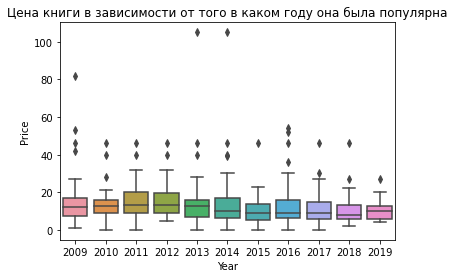

In [139]:
sns.boxplot(x="Year", y="Price", 
            data=df).set_title('Цена книги в зависимости от того в каком году она была популярна')

По графику видно, что самая высокая цена у тех книг,которые были популярны в 2013-2014 гг.

### График heatmap

In [140]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


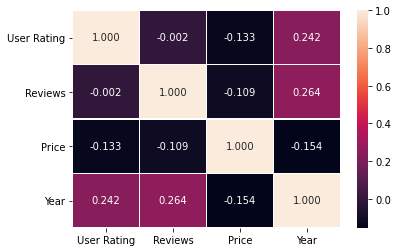

In [141]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f')
plt.show()

Нет четкой корреляции, но есть слабая корреляция между столбцами reviews и year.

### График scatter plot matrix

Text(0.5, 1.0, 'Reviews - User Rating Plot')

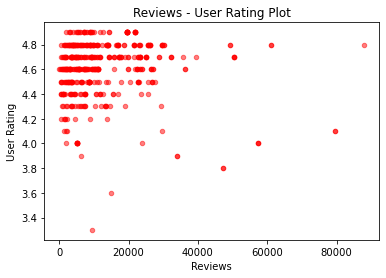

In [142]:
df.plot(kind='scatter', x='Reviews', y='User Rating',alpha = 0.5,color = 'red')
plt.xlabel('Reviews')            
plt.ylabel('User Rating')
plt.title('Reviews - User Rating Plot')

Согласно приведенному выше графику, мы видим, что корреляция между рейтингом пользователей и количеством отзывов слабая.
Однако график также показывает, что книги с относительно высокими оценками имеют большее количество отзывов

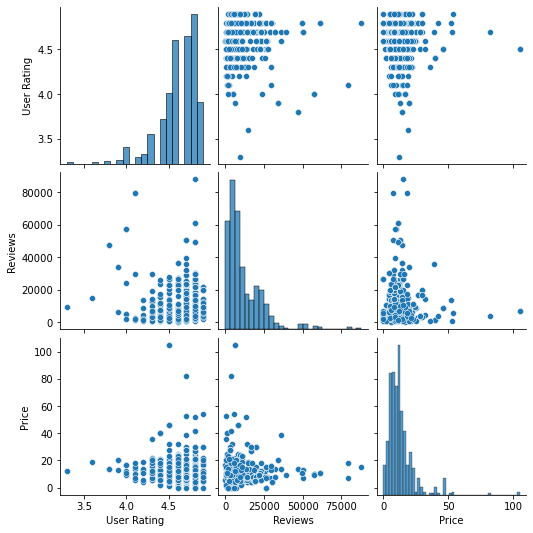

In [143]:
sns_plot = sns.pairplot(
    df[['User Rating', 'Reviews', 'Price']])
sns_plot

Основываясь на построенной матрице корреляции, а также на построенных визуализациях, можно увидеть, что данные не содержат какой-либо положительной или отрицательной линейной зависимости между рейтингом, отзывами и ценой на книги.